<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Загрузка и изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


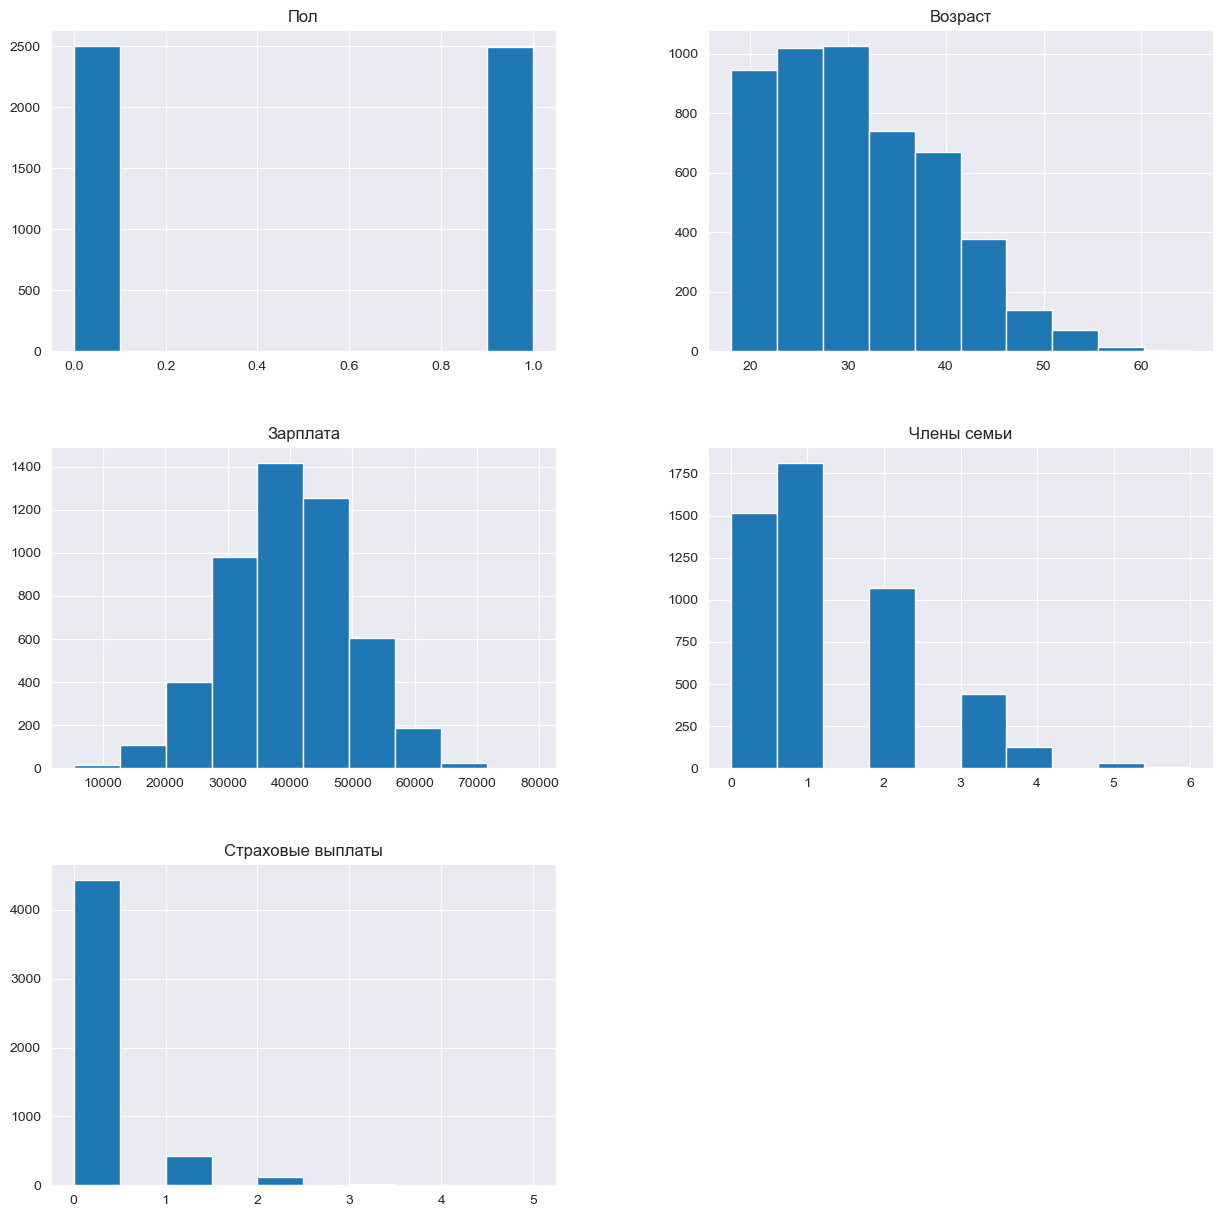

In [7]:
data = pd.read_csv('C:/Users/dmitr/Jupiter_Notebook/datasets/Module_3/insurance.csv')
data.info()
data.describe()
display(data.head(10))
data.hist(figsize=(15,15));

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножу матрицу $X$ на какую-нибудь обратимую матрицу $A$ той же размерности что и $X$:

$$
w = ((X A)^T X A)^{-1}(XA)^Ty
$$

Используя свойства транспонированных и обратных матриц получаю:

$$
w = (A^T X^T X A)^{-1}A^TX^Ty
$$

$$
w = A^{-1}(X^TX)^{-1}(A^T)^{-1}A^TX^Ty
$$

$$
w = A^{-1}(X^TX)^{-1}X^Ty
$$



**Ответ:** ...

**Обоснование:** ...

## Алгоритм преобразования

In [17]:
features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.75, test_size = 0.25, random_state = 12345)

In [26]:
A = np.random.randint(1,100,(features.shape[1], features.shape[1]))
print(A.shape)
print(np.linalg.inv(A))

(4, 4)
[[ 0.07786305  0.0107593   0.01419772 -0.08075056]
 [ 0.09437125 -0.00412943 -0.00831822 -0.07704144]
 [-0.22401478 -0.01732269  0.04158633  0.21045583]
 [-0.03618887  0.01192523 -0.01163078  0.03387126]]


In [27]:
print(features.shape)
print(target.shape)
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(5000, 4)
(5000,)
(3750, 4)
(3750,)
(1250, 4)
(1250,)


In [31]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_without_cryptograhy = model.predict(features_test)
print(model.coef_)
print(f'r2_without_cryptograhy: {r2_score(target_test, predictions_without_cryptograhy)}')
model.fit(np.array(features_train)@A, target_train)
predictions_with_cryptograpy = model.predict(np.array(features_test)@A)
print(A@model.coef_)
print(f'r2_with_protection: {r2_score(target_test, predictions_with_cryptograpy)}')
print(predictions_without_cryptograhy)
print(predictions_with_cryptograpy)

[ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
r2_without_cryptograhy: 0.43522757127026546
[ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
r2_with_protection: 0.4352275712701452
[0.17494798 0.80523476 0.45599281 ... 0.3129923  0.34926113 0.7886826 ]
[0.17494798 0.80523476 0.45599281 ... 0.3129923  0.34926113 0.7886826 ]


Можно заметить, что оценка **r2** для тестовой выборки почти не поменялась (а даже чуть чуть улучшилась)

**Алгоритм**

...

**Обоснование**

...

## Проверка алгоритма

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования